# Proyek Analisis Data: Nama dataset
- Nama: Moh. Arda Fadli Robby
- Email: fadlynasya@gmail.com
- Id Dicoding:ardafadly

## Menentukan Pertanyaan Bisnis

- Bagaimana dampak musiman terhadap pola penggunaan layanan berbagi sepeda?
- Bagaimana pola tren penggunaan layanan berbagi sepeda dalam skala tahunan, bulanan, dan harian?
- Apa faktor lingkungan yang memainkan peran penting dalam pola penggunaan layanan berbagi sepeda?


## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Gathering Data

table dataset hour

In [3]:
tb_hour = pd.read_csv('./drive/MyDrive/dataset/Bike-sharing-dataset/hour.csv')
tb_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


table dataset day

In [4]:
tb_day = pd.read_csv('./drive/MyDrive/dataset/Bike-sharing-dataset/day.csv')
tb_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

pengecekan dataset table hour

In [5]:
tb_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pengecekan missing value

In [6]:
tb_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pengecekan data yang sama

In [7]:
tb_hour.duplicated().sum()

0

pengecekan parameter dari setiap variable

In [8]:
tb_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


pengecekan dataset table day

In [9]:
tb_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


pengecekan missing value

In [10]:
tb_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pengecekan data yang sama

In [11]:
tb_day.duplicated().sum()

0

pengecekan parameter dari setiap variable

In [12]:
tb_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

karena pada saat melakukan pengecekan tipe dataset pada table day dan hour saya menemukan satu variable yang mempunyai tipe data yang salah, maka saya akan memperbaiki tipe data tersebut agar sesuai

fix tipe data

In [13]:
tb_hour["dteday"] = pd.to_datetime(tb_hour["dteday"])
tb_day["dteday"] = pd.to_datetime(tb_day["dteday"])

lakukan pengecekan tipe data kembali

In [14]:
tb_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
tb_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

dengan ini variable dteday sudah sesuai dengan tipe datanya dan tidak menggangu ketika nanti akan digunakan

## Exploratory Data Analysis (EDA)

### Explore table hour

In [16]:
tb_hour.hr.value_counts().sort_index()

0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64

In [17]:
tb_hour.loc[tb_hour["weathersit"] == 1, "weathersit"] = "Clear"
tb_hour.loc[tb_hour["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
tb_hour.loc[tb_hour["weathersit"] == 3, "weathersit"] = "Light Snow"
tb_hour.loc[tb_hour["weathersit"] == 4, "weathersit"] = "Heavy Rain"

tb_hour.weathersit.value_counts().sort_index()

Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: weathersit, dtype: int64

### Explore table day

ambil 5 sample data dari table day

In [18]:
tb_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
213,214,2011-08-02,3,0,8,0,2,1,1,0.783333,0.707071,0.491250,0.205850,801,4044,4845
174,175,2011-06-24,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991
665,666,2012-10-27,4,1,10,0,6,0,2,0.530000,0.515133,0.720000,0.235692,2643,5209,7852
536,537,2012-06-20,2,1,6,0,3,1,1,0.782500,0.720975,0.592083,0.113812,872,5339,6211
505,506,2012-05-20,2,1,5,0,0,0,1,0.620833,0.583967,0.530417,0.254367,2704,4425,7129


In [19]:
tb_day["temp"] = tb_day["temp"].multiply(41)
tb_day["atemp"] = tb_day["atemp"].multiply(50)
tb_day["hum"] = tb_day["hum"].multiply(100)
tb_day["windspeed"] = tb_day["windspeed"].multiply(67)

tb_day.describe(include="all")

<ipython-input-19-161c2e7169d5>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tb_day.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


In [20]:
tb_day.loc[tb_day["season"] == 1, "season"] = "Springer"
tb_day.loc[tb_day["season"] == 2, "season"] = "Summer"
tb_day.loc[tb_day["season"] == 3, "season"] = "Fall"
tb_day.loc[tb_day["season"] == 4, "season"] = "Winter"

tb_day.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [21]:
tb_day.loc[tb_day["yr"] == 0, "yr"] = "2011"
tb_day.loc[tb_day["yr"] == 1, "yr"] = "2012"

tb_day.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [22]:
tb_day.mnth.value_counts().sort_index()


1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
Name: mnth, dtype: int64

In [23]:
tb_day.loc[tb_day["holiday"] == 0, "holiday"] = "Holiday"
tb_day.loc[tb_day["holiday"] == 1, "holiday"] = "Not a Holiday"

tb_day.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [24]:
tb_day.loc[tb_day["weekday"] == 0, "weekday"] = "Sun"
tb_day.loc[tb_day["weekday"] == 1, "weekday"] = "Mon"
tb_day.loc[tb_day["weekday"] == 2, "weekday"] = "Tue"
tb_day.loc[tb_day["weekday"] == 3, "weekday"] = "Wed"
tb_day.loc[tb_day["weekday"] == 4, "weekday"] = "Thu"
tb_day.loc[tb_day["weekday"] == 5, "weekday"] = "Fri"
tb_day.loc[tb_day["weekday"] == 6, "weekday"] = "Sat"

tb_day.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [25]:
tb_day.loc[tb_day["workingday"] == 0, "workingday"] = "Holiday"
tb_day.loc[tb_day["workingday"] == 1, "workingday"] = "Working Day"

tb_day.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [26]:
tb_day.loc[tb_day["weathersit"] == 1, "weathersit"] = "Clear"
tb_day.loc[tb_day["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
tb_day.loc[tb_day["weathersit"] == 3, "weathersit"] = "Light Snow"
tb_day.loc[tb_day["weathersit"] == 4, "weathersit"] = "Heavy Rain"

tb_day.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>]], dtype=object)

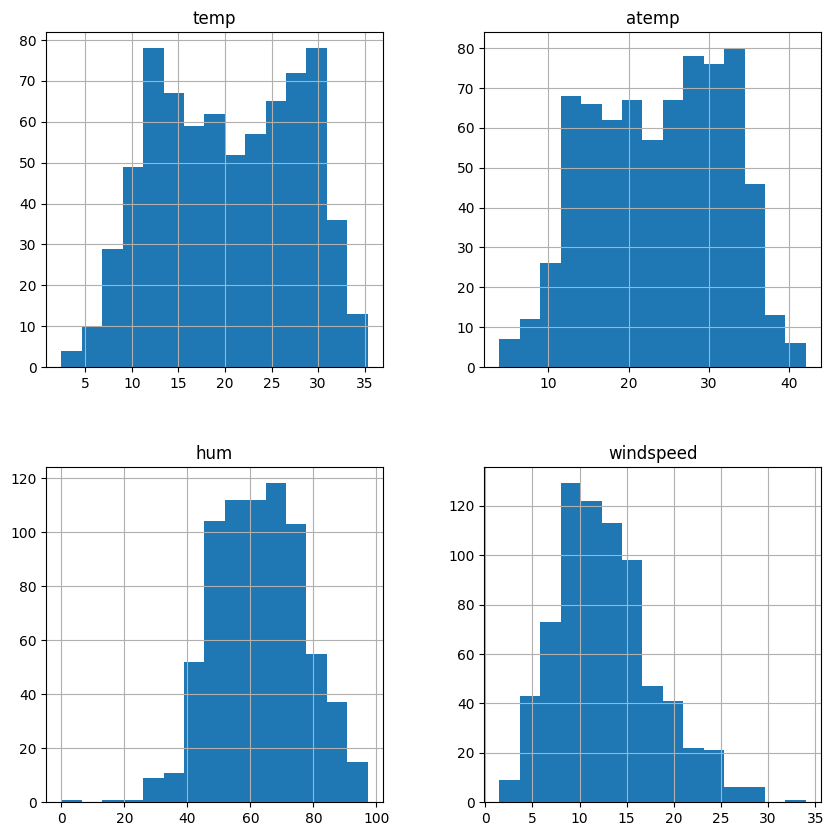

In [27]:
day_num_df = tb_day[["temp", "atemp", "hum", "windspeed"]]
day_num_df.hist(bins=15, figsize=(10, 10))

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

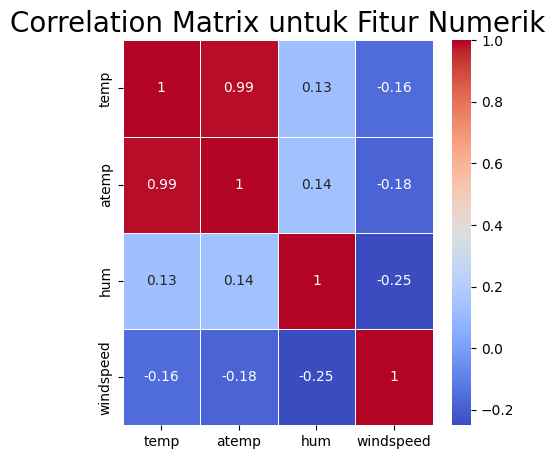

In [28]:
plt.figure(figsize = (5, 5))
correlation_matrix = day_num_df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size = 20)

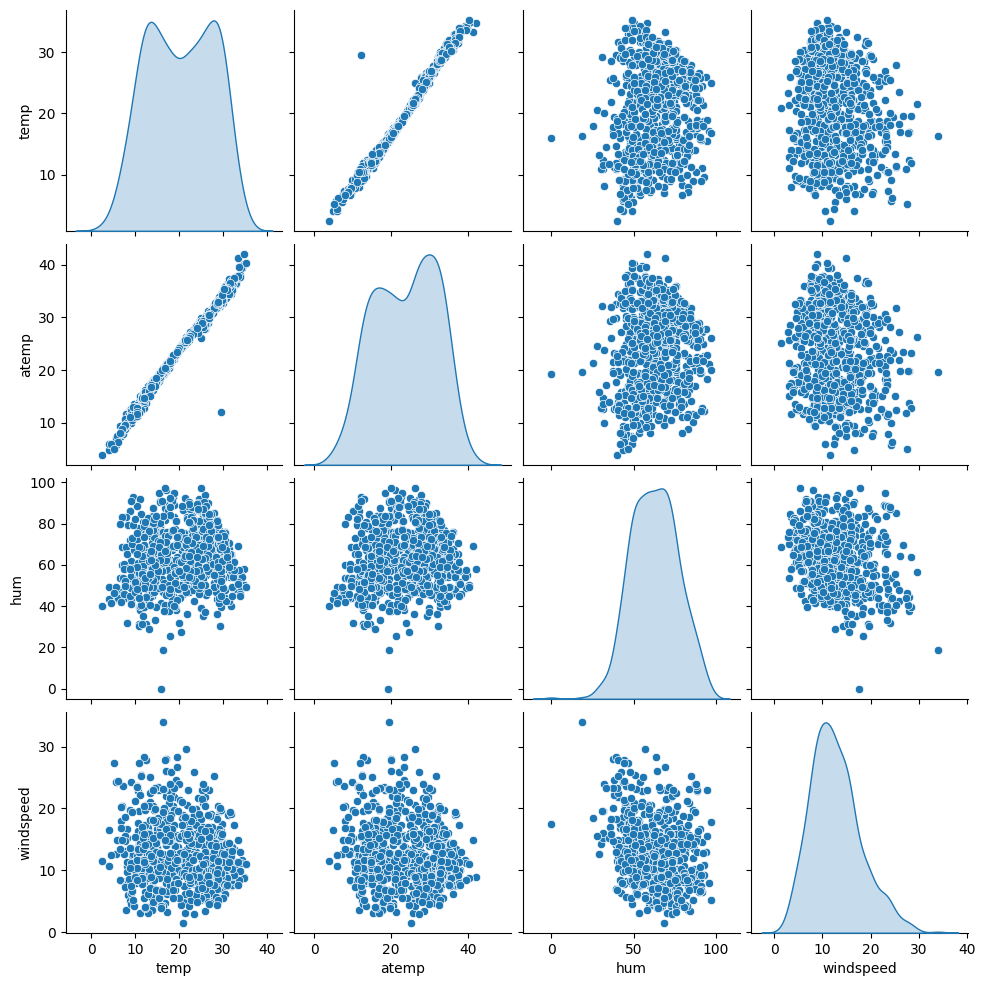

In [29]:
sns.pairplot(data=day_num_df, diag_kind="kde")

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Musim Dapat Mempengaruhi dalam penggunaan bike sharing

In [31]:
musiman = tb_day.groupby(by="season").instant.nunique().reset_index()
musiman.rename(columns={
    "instant": "sum"
}, inplace=True)
musiman

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


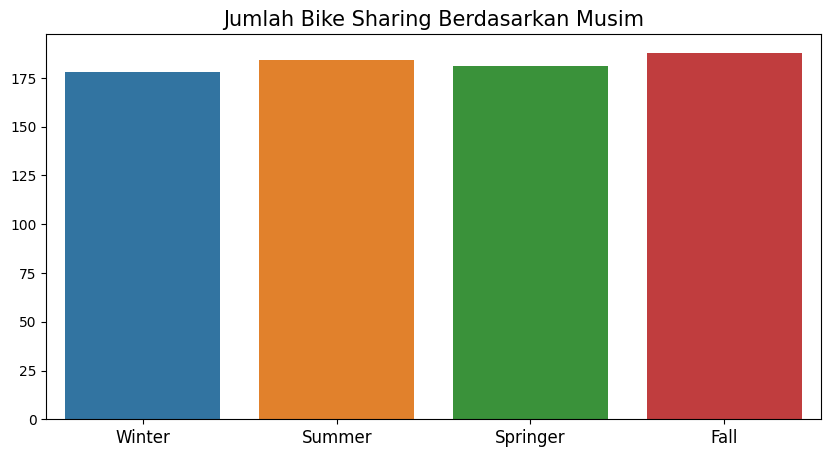

In [37]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="season",
    data=musiman.sort_values(by="season", ascending=False),
)
plt.title("Jumlah Bike Sharing Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 2: Apakah Cuaca Dapat Mempengaruhi dalam penggunaan bike sharing

In [35]:
cuaca = tb_day.groupby(by="weathersit").instant.nunique().reset_index()
cuaca.rename(columns={
    "instant": "sum"
}, inplace=True)
cuaca

,weathersit,sum
0,Clear,463
1,Light Snow,21
2,Mist + Cloudy,247


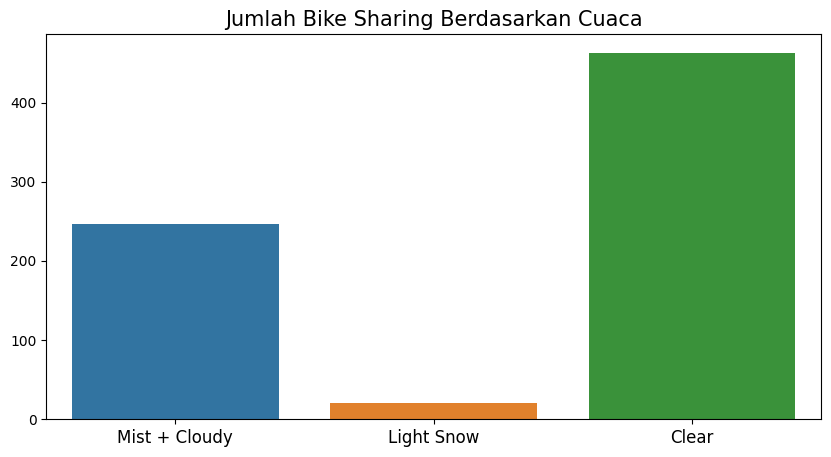

In [51]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="weathersit",
    data=cuaca.sort_values(by="weathersit", ascending=False),
)
plt.title("Jumlah Bike Sharing Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

### Pertanyaan 3: Apakah Faktor lingkungan Dapat Mempengaruhi dalam penggunaan bike sharing

untuk kali ini saya akan menggunakan analisis regression

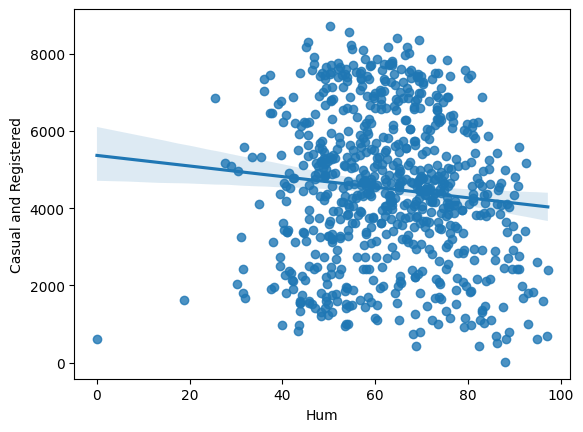

In [39]:
sns.regplot(x=tb_day["hum"], y=tb_day["cnt"])
plt.xlabel("Hum")
plt.ylabel("Casual and Registered")
plt.show()

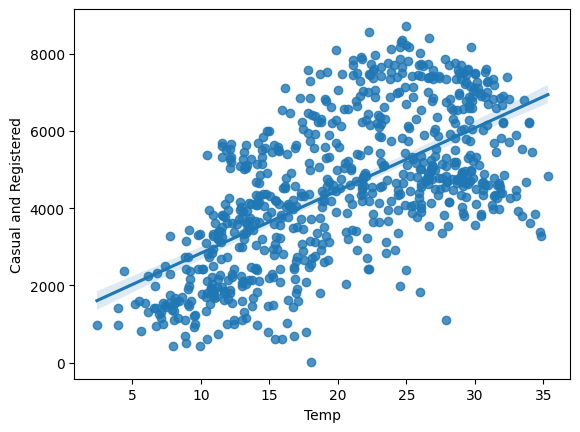

In [40]:
sns.regplot(x=tb_day["temp"], y=tb_day["cnt"])
plt.xlabel("Temp")
plt.ylabel("Casual and Registered")
plt.show()

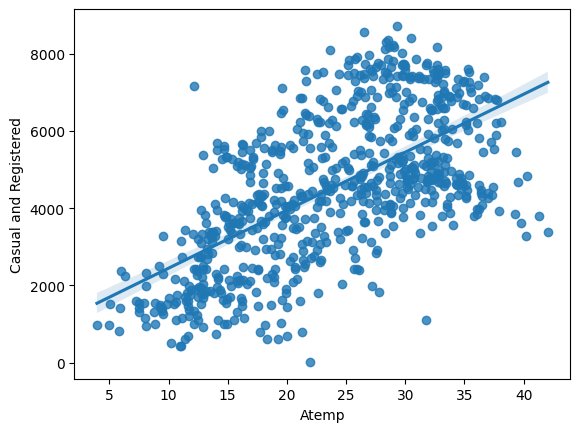

In [41]:
sns.regplot(x=tb_day["atemp"], y=tb_day["cnt"])
plt.xlabel("Atemp")
plt.ylabel("Casual and Registered")
plt.show()

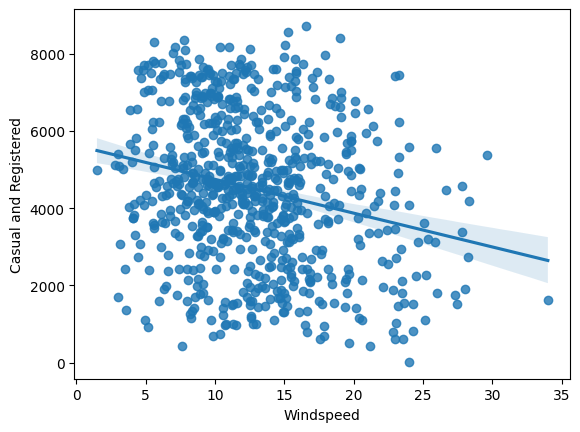

In [42]:
sns.regplot(x=tb_day["windspeed"], y=tb_day["cnt"])
plt.xlabel("Windspeed")
plt.ylabel("Casual and Registered")
plt.show()

Text(0.5, 0, 'Hum')

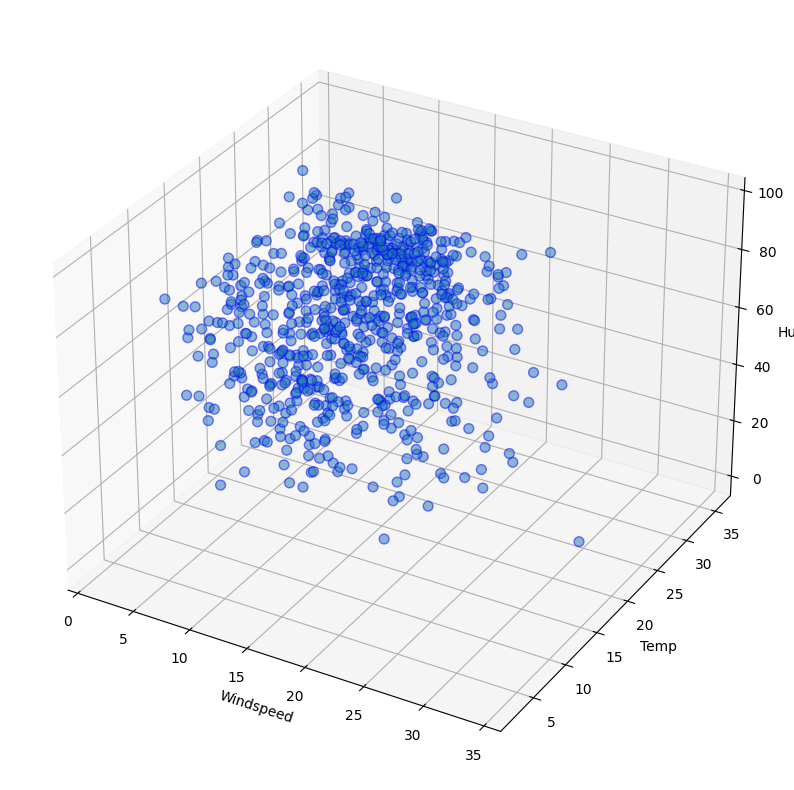

In [53]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ys = tb_day['temp']
zs = tb_day['hum']
xs = tb_day['windspeed']
ax.scatter(xs, ys, zs, s=50, alpha=0.5, edgecolors='b')

ax.set_xlabel('Windspeed')
ax.set_ylabel('Temp')
ax.set_zlabel('Hum')

### Pertanyaan 4: Apakah Hari Libur dan Hari Kerja Dapat Mempengaruhi dalam penggunaan bike sharing

In [46]:
harikerja = tb_day.groupby(by="workingday").instant.nunique().reset_index()
harikerja.rename(columns={
    "instant": "sum"
}, inplace=True)
harikerja

,workingday,sum
0,Holiday,231
1,Working Day,500


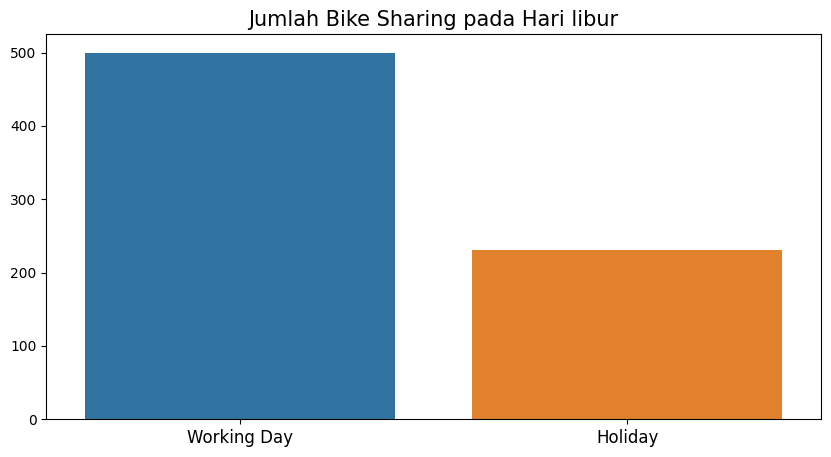

In [48]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="workingday",
    data=harikerja.sort_values(by="workingday", ascending=False),
)
plt.title("Jumlah Bike Sharing pada Hari libur", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

In [49]:
harilibur = tb_day.groupby(by="holiday").instant.nunique().reset_index()
harilibur.rename(columns={
    "instant": "sum"
}, inplace=True)
harilibur

,holiday,sum
0,Holiday,710
1,Not a Holiday,21


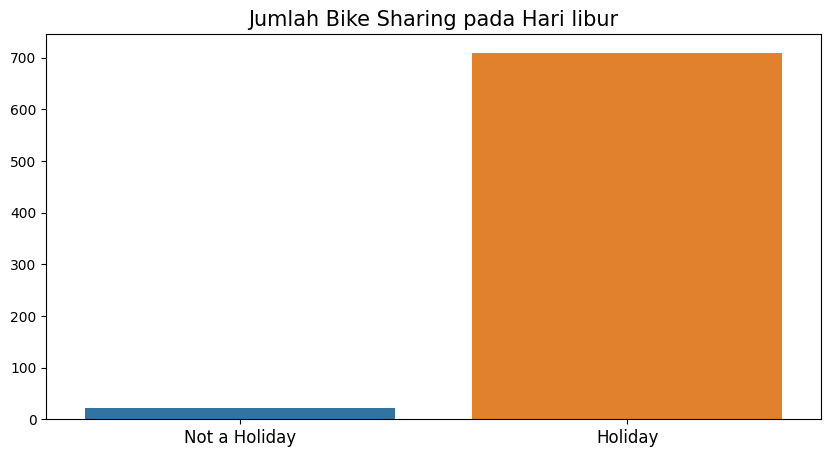

In [50]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="holiday",
    data=harilibur.sort_values(by="holiday", ascending=False),
)
plt.title("Jumlah Bike Sharing pada Hari libur", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1 ->
Setelah menganalisis data dalam tabel musim, terlihat bahwa jumlah pengguna layanan berbagi sepeda cenderung lebih tinggi pada musim gugur (fall). Dengan demikian, dapat ditarik kesimpulan bahwa musim gugur memiliki dampak yang signifikan terhadap pola penggunaan layanan berbagi sepeda.

- conclution pertanyaan 2 ->
Setelah menganalisis data dalam tabel cuaca, terlihat bahwa jumlah pengguna layanan berbagi sepeda cenderung lebih tinggi pada cuaca cerah (clear). Dengan demikian, dapat ditarik kesimpulan bahwa cuaca cerah memiliki dampak yang signifikan terhadap pola penggunaan layanan berbagi sepeda.

- conclution pertanyaan 3 ->
Berdasarkan analisis terhadap data dalam kolom tb_day, dapat diamati bahwa terdapat hubungan positif antara variabel suhu (temp) dan jumlah pengguna layanan berbagi sepeda (cnt), serta antara variabel suhu yang dirasakan (atemp) dan jumlah pengguna layanan berbagi sepeda. Selain itu, kelembapan udara (hum) juga memiliki pengaruh terhadap jumlah pengguna layanan jika berada dalam rentang 40-85%. Selain itu, kecepatan angin (windspeed) juga memengaruhi jumlah pengguna layanan saat berada dalam rentang 3-20 knot. Dengan demikian, dapat disarankan bahwa faktor-faktor lingkungan seperti suhu, suhu yang dirasakan, kelembapan udara, dan kecepatan angin dalam rentang tertentu memiliki pengaruh yang signifikan terhadap pola penggunaan layanan berbagi sepeda.

- conclution pertanyaan 4
Berdasarkan analisis data dari tabel harilibur, terlihat bahwa jumlah pengguna layanan berbagi sepeda cenderung lebih tinggi pada hari libur. Sementara itu, hasil pengamatan pada tabel harikerja menunjukkan bahwa banyak pengguna layanan berbagi sepeda terjadi pada hari kerja. Oleh karena itu, dapat disimpulkan bahwa pola penggunaan layanan berbagi sepeda dipengaruhi oleh faktor hari libur dan hari kerja, di mana jumlah pengguna lebih tinggi pada hari-hari tersebut.

In [52]:
tb_day.to_csv("dashboard\daynew.csv", index=False)